In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [61]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [62]:
faces.images.shape

(1348, 62, 47)

In [17]:
faces.data.shape

(1348, 2914)

### Plotting first 10 images

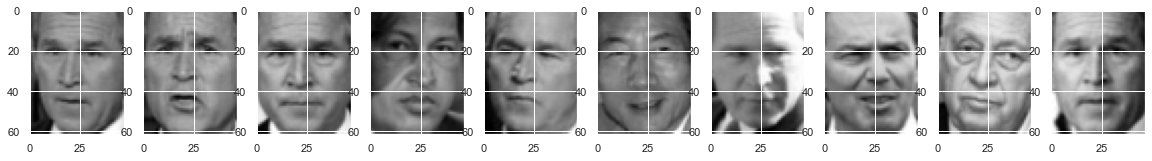

In [63]:
# Plot the results
fig, ax = plt.subplots(1, 10, figsize=(20,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(1,11): 
    plt.subplot(1,10,i)
    plt.imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
   

### Implementing PCA for reducing the dimentions

In [64]:
from sklearn.decomposition import PCA


In [65]:
pca=PCA()
pca.fit(faces.data)

PCA()

In [66]:
pca.components_.shape ## These are the eigen vectors or the principal components sorted.

(1348, 2914)

In [67]:
pca.explained_variance_ratio_

array([1.8782695e-01, 1.4550349e-01, 7.1001135e-02, ..., 2.4443881e-07,
       2.3992854e-07, 1.8833583e-12], dtype=float32)

In [68]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18782695, 0.33333045, 0.4043316 , ..., 0.9999999 , 1.0000001 ,
       1.0000001 ], dtype=float32)

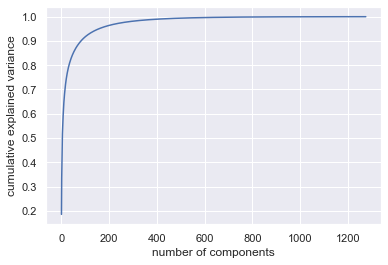

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### initial 100 components appear to capture 95% of variance

In [71]:
# Compute the components and projected faces
pca = PCA(100).fit(faces.data)
components = pca.transform(faces.data)
print(pca.components_.shape)
projected = pca.inverse_transform(components)

(100, 2914)


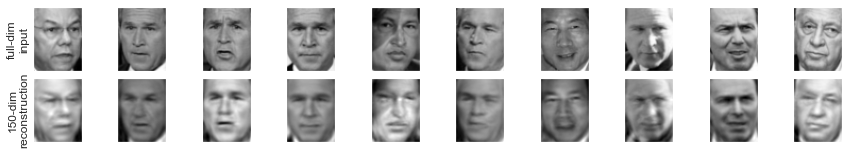

In [72]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(15, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [46]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

In [47]:
print(train_img.shape)

(1155, 2914)


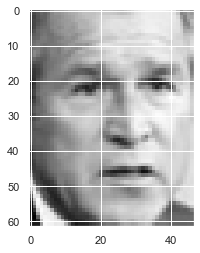

In [48]:
plt.imshow(train_img[1093].reshape(62,47),cmap='gray')

In [49]:
np.unique(train_lbl,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([ 67, 205, 102, 456,  93,  64,  49, 119], dtype=int64))

In [50]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [51]:
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)

In [52]:
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage


In [73]:
faces.target

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

In [76]:
variance = 1.0
def benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl):
    global benchmark
    print(train_img.shape)
    pca = PCA(variance)
    
    pca.fit(train_img)
    
    n_components = pca.n_components_
    
    train_img = pca.transform(train_img)

  
    test_img = pca.transform(test_img)
    
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = time.time()
    logisticRegr.fit(train_img, train_lbl)
    end =  time.time()
 
    timing = end-start   

    # Predict for Multiple Observations (images) at Once
    predicted = logisticRegr.predict(test_img)   

    # generate evaluation metrics
    accuracy = (metrics.accuracy_score(test_lbl, predicted))
    #return 
    a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
    benchmark = benchmark.append(a,ignore_index=True)

In [77]:
variance_list = [0.99,0.97,0.95,0.90,0.85,0.80,0.75,0.70]

In [57]:
for variance in variance_list:
    benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl)

(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)


In [58]:
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage
0,1.00,1155.0,2.289014,0.792746
1,0.99,391.0,0.450863,0.803109
2,0.97,220.0,0.339237,0.766839
3,0.95,154.0,0.310160,0.735751
4,0.90,82.0,0.247428,0.735751
5,0.85,50.0,0.214577,0.720207
6,0.80,32.0,0.225553,0.704663
7,0.75,22.0,0.234229,0.616580
8,0.70,16.0,0.213792,0.569948
